<h3> NCVS Data Analysis and Police Reporting Prediction </h3>

Part II: Household Victimization Analysis and Police Reporting Prediction

<span> Dataset                   : NCVS Household Victimization 1993-2019.csv </span> </br>
<span> Link                      : https://www.bjs.gov/developer/ncvs/data/csv/NCVS_HOUSEHOLD_1993-2019.zip </span> </br>
<span> Variable descriptions     : https://www.bjs.gov/developer/ncvs/householdFields.cfm </span>

<b> Notebook by: Uttej Kumar Reddy Gade </b> </br> 
<b> SJSU ID: 016065543 </b>

In [149]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

from sklearn.model_selection import train_test_split
# Regression 
from sklearn.linear_model import LinearRegression, LogisticRegression
# Classification 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Clustering
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
# Neural Networks
from sklearn.neural_network import MLPClassifier

# Performance Metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

# Principal Component Analysis
from sklearn.decomposition import PCA

<h1> Dataset </h1>

In [2]:
df = pd.read_csv('NCVS_HOUSEHOLD_VICTIMIZATION_1993-2019.csv')

In [3]:
df.head()

,year,weight,msa,hincome,hhage,hhgen,hhhisp,hhrace1r,hheth1r,hnumber,popsize,region,notify,newcrime,newoff,vicservices,locationr
0,1993,3219.62735,3,1,3,1,2,1,1,1,NaN,-1,2,3,8,2.0,1
1,1993,3219.62735,3,1,3,1,2,1,1,1,NaN,-1,2,3,8,2.0,1
2,1993,3219.62735,3,1,3,1,2,1,1,1,NaN,-1,2,3,8,2.0,1
3,1993,2999.05015,3,4,2,1,2,1,1,3,NaN,-1,1,3,8,2.0,1
4,1993,2999.05015,3,4,3,2,2,1,1,1,NaN,-1,2,3,8,2.0,1


In [4]:
df.shape

(216269, 17)

In [5]:
df.describe()

,year,weight,msa,hincome,hhage,hhgen,hhhisp,hhrace1r,hheth1r,hnumber,popsize,region,notify,newcrime,newoff,vicservices,locationr
count,216269.000000,216269.000000,216269.000000,216269.000000,216269.000000,216269.000000,216269.000000,216269.000000,216269.000000,216269.000000,177437.000000,216269.000000,216269.000000,216269.0,216269.000000,214994.000000,216269.000000
mean,2004.462822,2539.211250,1.731039,18.443323,3.115338,1.466673,2.208430,1.233825,1.603646,2.206262,1.598133,2.109322,1.661306,3.0,7.584027,1.983279,1.910343
std,8.361142,1954.156798,0.684604,31.214778,0.995070,0.498889,5.383467,0.532468,1.048591,0.819708,1.482455,1.714463,0.537349,0.0,0.781140,0.128226,1.272344
min,1993.000000,33.798650,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,1.000000,3.0,6.000000,1.000000,1.000000
25%,1997.000000,1955.989810,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.0,8.000000,2.000000,1.000000
50%,2003.000000,2248.094720,2.000000,5.000000,3.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,3.000000,2.000000,3.0,8.000000,2.000000,1.000000
75%,2012.000000,2812.389420,2.000000,7.000000,4.000000,2.000000,2.000000,1.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.0,8.000000,2.000000,3.000000
max,2019.000000,79767.074400,3.000000,88.000000,5.000000,2.000000,88.000000,3.000000,4.000000,4.000000,5.000000,4.000000,8.000000,3.0,8.000000,2.000000,5.000000


popsize and vicservices have some missing values

In [6]:
# Find out the number of missing values for popsize and vicservices
df.isnull().sum()

year               0
weight             0
msa                0
hincome            0
hhage              0
hhgen              0
hhhisp             0
hhrace1r           0
hheth1r            0
hnumber            0
popsize        38832
region             0
notify             0
newcrime           0
newoff             0
vicservices     1275
locationr          0
dtype: int64

A significant number of rows have 'popsize' as null (17%)  
Rows with empty 'vicservices' contribute for 0.6% of the total data

<h1> Exploratory Data Analysis </h1>

<b>1. What is the number of victimizations per year? </b>

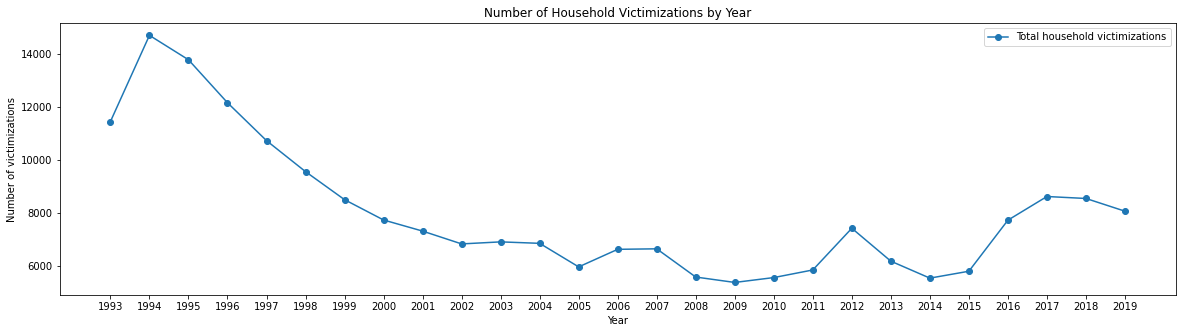

In [127]:
dfVicPerYear = df.groupby(['year']).size()

figVicPerYear = plt.figure()

axVicPerYear = plt.axes()
axVicPerYear.set_xlabel('Year')
axVicPerYear.set_ylabel('Number of victimizations')
axVicPerYear.set_title('Number of Household Victimizations by Year')

years = []
vicCounts = []
for year, vicCount in dfVicPerYear.groupby(level = 'year'):
  years.append(year)
  vicCounts.append(vicCount)

plt.plot(years, vicCounts, marker='o', label = 'Total household victimizations')
axVicPerYear.legend()

plt.xticks(years)
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.rcParams["figure.figsize"] = (20, 5)

plt.show()

In [8]:
figVicPerYear.savefig('01-number_of_household_victimizations_by_year.pdf', bbox_inches='tight')

<b>2. What are the reporting status (Notified, Not notified, Do not know, Unknown) counts through the Years</b>

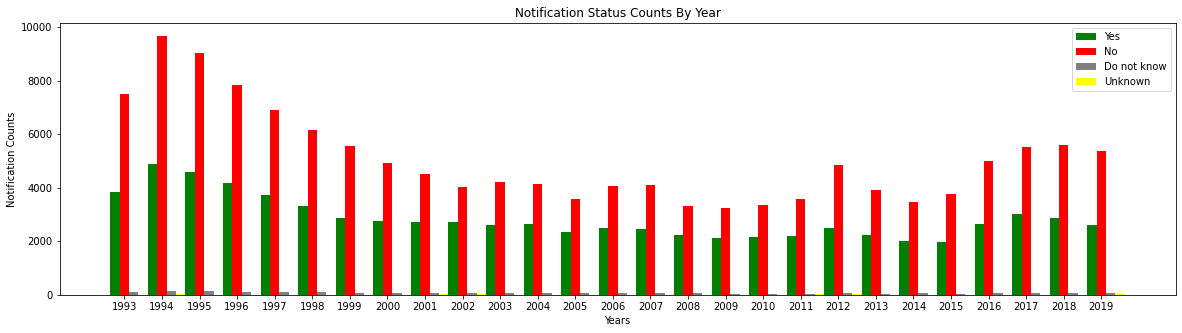

In [9]:
dfVicByNotifyPerYear = df.groupby(['year', 'notify']).size()

"""
[
  {
    year: 0,
    1: 0, # Yes
    2: 0, # No
    3: 0, # Do not know
    8: 0, # Unknown
  },
]
"""
notifyStatusPerYear = []

years = []

# Construct notifyStatusPerYear array of dictionaries 
for year, reporting in dfVicByNotifyPerYear.groupby(level = 'year'):
  years.append(year)
  
  notifyInfo = {}
  notifyInfo['year'] = year

  for i in range(len(reporting.keys())):
    notifyStatus = reporting.keys()[i][1]
    notifyStatusVal = reporting.values[i]
    notifyInfo[notifyStatus] = notifyStatusVal
  
  notifyStatusPerYear.append(notifyInfo)

# Function to get notification statuses in an array
def getStatusCounts (notifyStatus):
  notifyStatusCounts = []
  for x in notifyStatusPerYear:
    notifyStatusCounts.append(x[notifyStatus])
  return notifyStatusCounts

# Plot bar graphs
figVicByNotifyPerYear, axVicByNotifyPerYear = plt.subplots()

pltStartingIndex = np.arange(len(years))
width = 0.25

notifyYesCounts = getStatusCounts(1) # 1 = Yes
bar1 = plt.bar(pltStartingIndex, notifyYesCounts, width, color = 'green')

notifyNoCounts = getStatusCounts(2) # 2 = No
bar2 = plt.bar(pltStartingIndex + width, notifyNoCounts, width, color = 'red')

notifyDoNotKnowCounts = getStatusCounts(3) # 3 = Do not know
bar3 = plt.bar(pltStartingIndex + width * 2, notifyDoNotKnowCounts, width, color = 'grey')

notifyUnknownCounts = getStatusCounts(8) # 8 = Unknown
bar4 = plt.bar(pltStartingIndex + width * 3, notifyUnknownCounts, width, color = 'yellow')

plt.xlabel('Years')
plt.ylabel('Notification Counts')
plt.title('Notification Status Counts By Year')

plt.xticks(pltStartingIndex + width, years)
plt.legend( (bar1, bar2, bar3, bar4), ('Yes', 'No', 'Do not know', 'Unknown') )

plt.show()

From 1993-2019, the number of unnotified crimes has been consistently and significantly higher than notified crimes

In [10]:
figVicByNotifyPerYear.savefig('02-notification_status_counts_by_year.pdf', bbox_inches='tight')

<b>3. By what percentage are the un-notified victimisations higher than the notified through the years? </b>

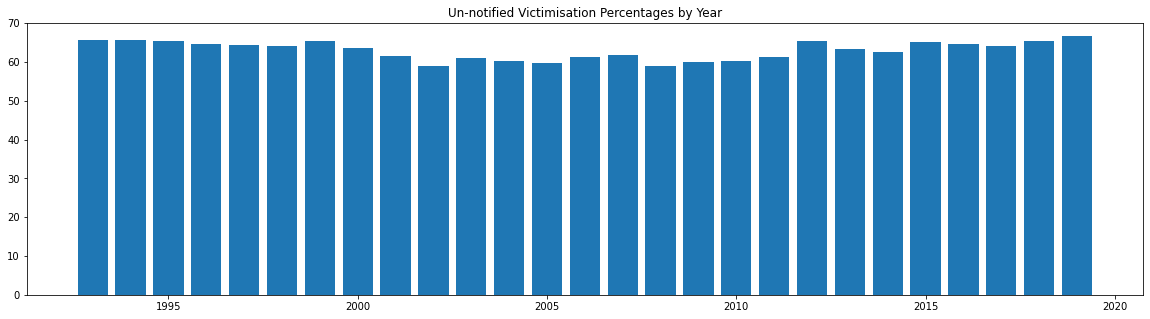

In [11]:
def getPercentageOfUnnotifiedVictimisation (year):
  for x in notifyStatusPerYear:
    if (x['year'] == year):
      return (x[2] / (x[1] + x[2] + x[3] + x[8])) * 100

percentageOfUnnotifiedVictimisationsByYear = []
for year in years:
  percentageOfUnnotifiedVictimisationsByYear.append(getPercentageOfUnnotifiedVictimisation(year))

figUnnotifiedPercentagePerYear = plt.figure()

plt.bar(years, percentageOfUnnotifiedVictimisationsByYear)
plt.title('Un-notified Victimisation Percentages by Year')

plt.show()

Every around, of the victimisations that occur, the percentage that go unnotified is around 60% higher than those that are notified

In [12]:
figUnnotifiedPercentagePerYear.savefig('03-unnotified-victimisation-percentages-by-year.pdf', bbox_inches='tight')

<b>4. What type of crimes are most likely to be reported? Similarly, what type of crimes are most likely to go unnotified? </b>  

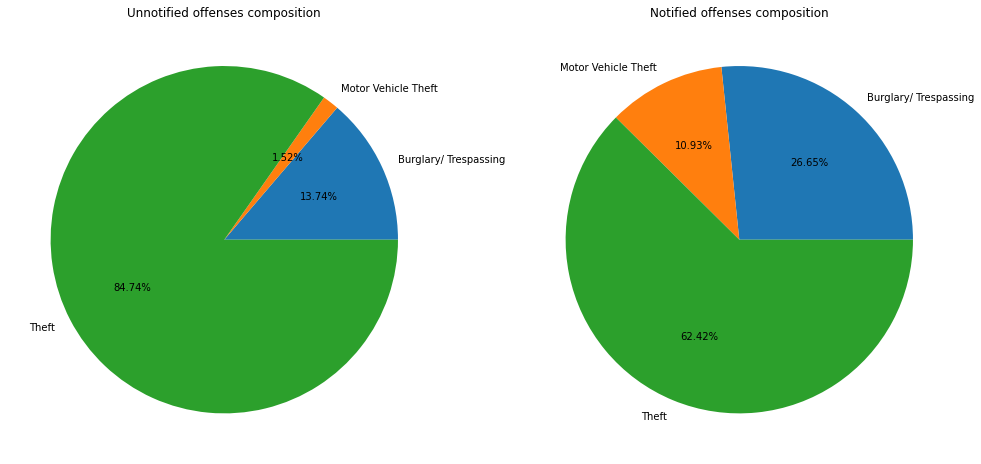

In [192]:
dfNotifyNo = df[df['notify'] == 2]
dfNotifyNoByNewoff = dfNotifyNo.groupby('newoff').size()

dfNotifyYes = df[df['notify'] == 1]
dfNotifYesByNewoff = dfNotifyYes.groupby('newoff').size()

notifNoNewoffCounts = dfNotifyNoByNewoff.values
notifYesNewoffCounts = dfNotifYesByNewoff.values

newoff = dfNotifyNoByNewoff.keys()
newoffLabels = []
for i in range(len(newoff)):
    if (newoff[i] == 6):
        newoffLabels.append('Burglary/ Trespassing')
    elif (newoff[i] == 7):
        newoffLabels.append('Motor Vehicle Theft')
    elif (newoff[i] == 8):
        newoffLabels.append('Theft')

figReportingStatusByCrime, (ax1ReportingStatusByCrime, ax2ReportingStatusByCrime) = plt.subplots(1, 2, figsize = (15, 10))
figReportingStatusByCrime.tight_layout(pad=5.0)

ax1ReportingStatusByCrime.pie(notifNoNewoffCounts, labels = newoffLabels, autopct = '%1.2f%%')
ax1ReportingStatusByCrime.set_title('Unnotified offenses composition')

ax2ReportingStatusByCrime.pie(notifYesNewoffCounts, labels = newoffLabels, autopct = '%1.2f%%')
ax2ReportingStatusByCrime.set_title('Notified offenses composition')

plt.show()

Of the victimisations that go unnotified, Theft is the first, followed by Burglary/ Trespassing and then, Motor Vehicle Theft.  
Theft is also the category which is most reported to the police amongst household victimisations which do get reported, followed by Burglary/ Trespassing and finally Motor Vehicle Theft. 

In [193]:
figReportingStatusByCrime.savefig('04-reporting-status-by-crime.pdf', bbox_inches='tight')

<b>5. How does the location of residence of household affect notifications? </b>

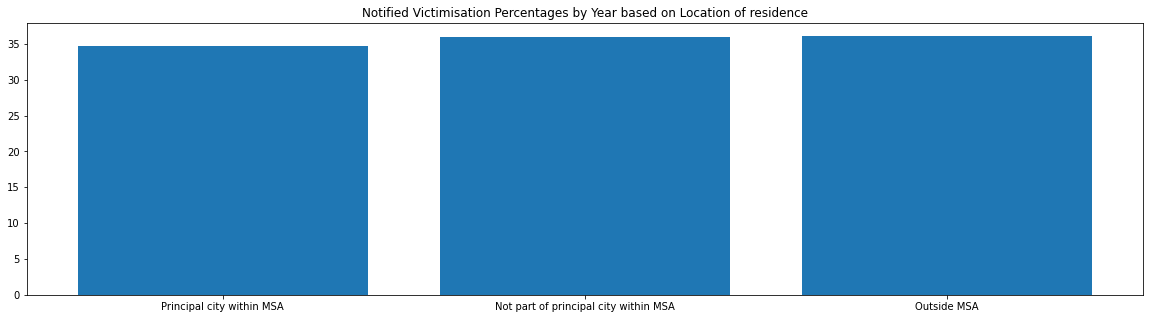

In [195]:
dfByMSAAndNotif = df.groupby(['msa', 'notify']).size()

locationOfResidence = []
reportedCount = []
notReportedCount = []
doNotKnowCount = []
unknownCount = []

for msa, notification in dfByMSAAndNotif.groupby(level='msa'):
  if msa == 1:
    locationOfResidence.append('Principal city within MSA')
  elif msa == 2:
    locationOfResidence.append('Not part of principal city within MSA')
  elif msa == 3:
    locationOfResidence.append('Outside MSA')

  reportedCount.append(notification.values[0])
  notReportedCount.append(notification.values[1])
  doNotKnowCount.append(notification.values[2])
  unknownCount.append(notification.values[3])

def getPercentageOfNotifiedVictimisationsBasedOnLocationOfResidence (i): # parameter: location of residence index
  return (reportedCount[i] / (reportedCount[i] + notReportedCount[i] + doNotKnowCount[i] + unknownCount[i])) * 100

percentageOfNotifiedVictimisationsByLocation = []
for i in range(len(locationOfResidence)):
  percentageOfNotifiedVictimisationsByLocation.append(getPercentageOfNotifiedVictimisationsBasedOnLocationOfResidence(i))

figNotifiedPercentagesByLocationOfResidence = plt.figure()

plt.bar(locationOfResidence, percentageOfNotifiedVictimisationsByLocation)
plt.title('Notified Victimisation Percentages by Year based on Location of residence')
plt.xticks(locationOfResidence)
plt.show()

There is a very slight difference, but household situated outside MSAs report a higher percentage of victimisations to the police

In [197]:
figNotifiedPercentagesByLocationOfResidence.savefig('05-notified-percentage-by-location-of-residence.pdf', bbox_inches='tight')

<b> 6. How does the household income affect if a victimisation gets notified or not? </b>

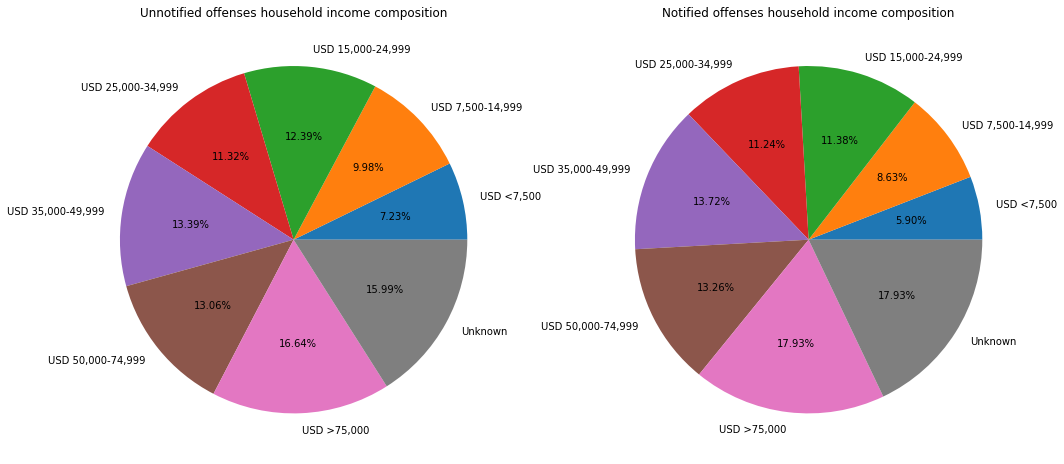

In [200]:
dfByIncomeAndNotify = df.groupby(['notify', 'hincome']).size()

householdIncomeRanges = [
  'USD <7,500',
  'USD 7,500-14,999',
  'USD 15,000-24,999',
  'USD 25,000-34,999',
  'USD 35,000-49,999',
  'USD 50,000-74,999',
  'USD >75,000',
  'Unknown'
]

notifiedHouseholdIncomeRanges = []
unnotifiedHouseholdIncomeRanges = []

for notify, hincome in dfByIncomeAndNotify.groupby(level='notify'):
  if notify == 1:
    notifiedHouseholdIncomeRanges = hincome.values
  if notify == 2:
    unnotifiedHouseholdIncomeRanges = hincome.values


figHouseholdIncomeAndNotification, (axHouseholdIncomeAndNotification1, axHouseholdIncomeAndNotification2) = plt.subplots(1, 2, figsize = (15, 15))
figHouseholdIncomeAndNotification.tight_layout(pad=5.0)

axHouseholdIncomeAndNotification1.pie(unnotifiedHouseholdIncomeRanges, labels = householdIncomeRanges, autopct = '%1.2f%%')
axHouseholdIncomeAndNotification1.set_title('Unnotified offenses household income composition')

axHouseholdIncomeAndNotification2.pie(notifiedHouseholdIncomeRanges, labels = householdIncomeRanges, autopct = '%1.2f%%')
axHouseholdIncomeAndNotification2.set_title('Notified offenses household income composition')

plt.show()

We see that there is not a huge difference in notification status among households of different income levels.  
The most difference is seen for households with income level less than $7000 and households of income $7500-14,999  
wherein the percentage difference between notified and unnotified is ~1.3% favoring towards unnotified.

In [202]:
figHouseholdIncomeAndNotification.savefig('06-household-income-effect.pdf', bbox_inches='tight')

<b>7. How does age affect the decision to report a victimisation </b>

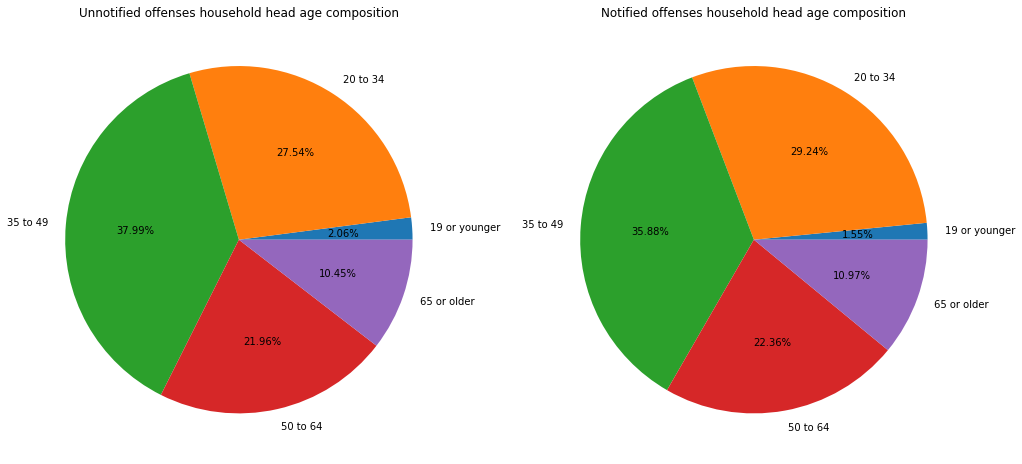

In [204]:
# How does household age affect
dfNotifyByAge = df.groupby(['notify', 'hhage']).size()

householdAgeRanges = [
  '19 or younger',
  '20 to 34',
  '35 to 49',
  '50 to 64',
  '65 or older',
]

notifiedHouseholdHeadAgeRanges = []
unnotifiedHouseholdHeadAgeRanges = []

for notify, hhageValues in dfNotifyByAge.groupby(level='notify'):
  if notify == 1:
    notifiedHouseholdHeadAgeRanges = hhageValues.values
  if notify == 2:
    unnotifiedHouseholdHeadAgeRanges = hhageValues.values

figHouseholdHeadAgeAndNotifications, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 15))
figHouseholdHeadAgeAndNotifications.tight_layout(pad=5.0)

ax1.pie(unnotifiedHouseholdHeadAgeRanges, labels = householdAgeRanges, autopct = '%1.2f%%')
ax1.set_title('Unnotified offenses household head age composition')

ax2.pie(notifiedHouseholdHeadAgeRanges, labels = householdAgeRanges, autopct = '%1.2f%%')
ax2.set_title('Notified offenses household head age composition')

plt.show()

From the above charts, it can be concluded that age of the household head does not hugely influence the decision to report victimisations.  

In [205]:
figHouseholdHeadAgeAndNotifications.savefig('07-household-head-age-effect.pdf', bbox_inches='tight')

<b> 8. Does victimisation count change depending on the sex of the household head? </b>

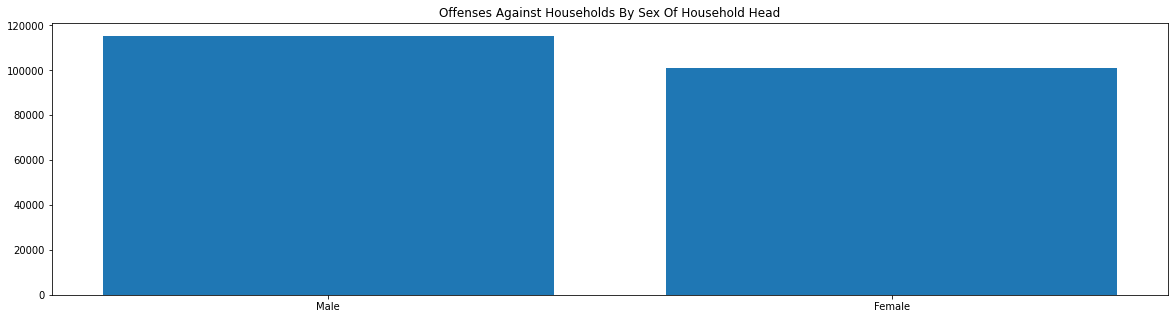

In [207]:
dfByHouseholdHeadGender = df.groupby('hhgen').size()

householdHeadSex = ['Male', 'Female']

figOffensesAgainstHouseholdsBySexOfHouseholdHead = plt.figure()
plt.bar(householdHeadSex, dfByHouseholdHeadGender.values)
plt.title('Offenses Against Households By Sex Of Household Head')
plt.show()

There is only a slight difference

In [208]:
figOffensesAgainstHouseholdsBySexOfHouseholdHead.savefig('08-victimisations-by-hhgen.pdf', bbox_inches='tight')

<b> 9. Is there a change in the notification percentage based on the sex of the household head? </b>

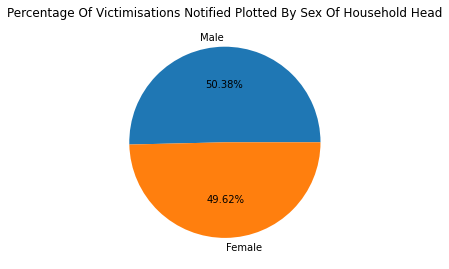

In [211]:
dfNotificationByHHGen = df.groupby(['hhgen', 'notify']).size()

maleNotificationComposition = []
femaleNotificationComposition = []
for hhgen, notify in dfNotificationByHHGen.groupby(level='hhgen'):
  if (hhgen == 1):
    maleNotificationComposition = notify.values
  if (hhgen == 2):
    femaleNotificationComposition = notify.values

maleNotificationsPercentage = maleNotificationComposition[0] / sum(maleNotificationComposition)
femaleNotificationsPercentage = femaleNotificationComposition[0] / sum(femaleNotificationComposition)

figNotificationPercentageByHHGen, ax1 = plt.subplots()
figNotificationPercentageByHHGen.tight_layout(pad=5.0)

ax1.pie([maleNotificationsPercentage, femaleNotificationsPercentage], labels = householdHeadSex, autopct = '%1.2f%%')
ax1.set_title('Percentage Of Victimisations Notified Plotted By Sex Of Household Head')

plt.show()

The percentage of reportings based on the sex of the household head is nearly the same for both sexes

In [212]:
figNotificationPercentageByHHGen.savefig('09-notification-percentage-by-hhgen.pdf', bbox_inches='tight')

<b> 10. Which race (of household head) is most affected by household victimisations? </b>

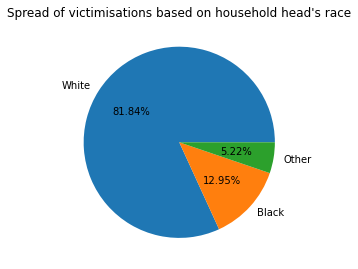

In [214]:
dfByHHRace = df.groupby(['hhrace1r']).size()

figVictimisationsByHouseholdHeadRace, ax1 = plt.subplots()
figVictimisationsByHouseholdHeadRace.tight_layout(pad=5.0)

ax1.pie(dfByHHRace.values, labels = ['White', 'Black', 'Other'], autopct = '%1.2f%%')
ax1.set_title('Spread of victimisations based on household head\'s race')

plt.show()

Predominantly, households with head's of race White are more prone to victimisations

In [215]:
figVictimisationsByHouseholdHeadRace.savefig('10-victimisations-by-hh-race.pdf', bbox_inches='tight')

<b> Does race of the household head affect reporting? </b>

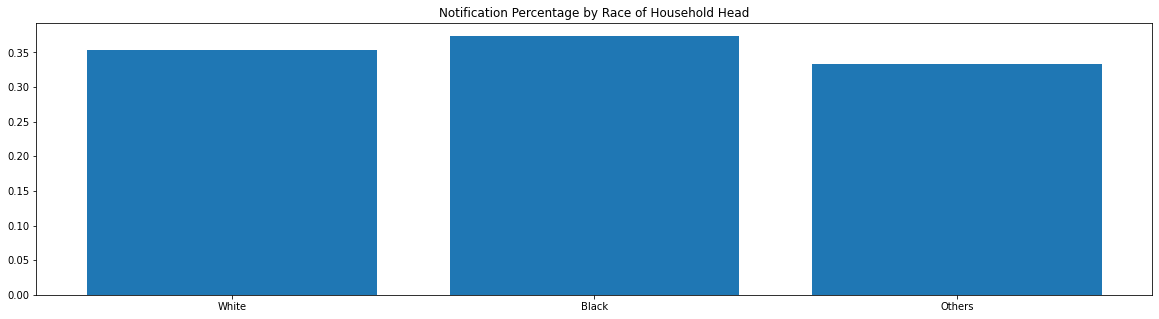

In [216]:
dfByRaceAndNotification = df.groupby(['hhrace1r', 'notify']).size()

whiteNotificationComposition = []
blackNotificationComposition = []
othersNotificationComposition = []

for race, notification in dfByRaceAndNotification.groupby(level='hhrace1r'):
  if (race == 1):
    whiteNotificationComposition = notification.values
  if (race == 2):
    blackNotificationComposition = notification.values
  if (race == 3):
    othersNotificationComposition = notification.values
  
whiteNotificationPercentage = whiteNotificationComposition[0] / sum(whiteNotificationComposition)
blackNotificationPercentage = blackNotificationComposition[0] / sum(blackNotificationComposition)
othersNotificationPercentage = othersNotificationComposition[0] / sum(othersNotificationComposition)

figByRaceAndNotfication = plt.figure()
plt.bar(['White', 'Black', 'Others'], [whiteNotificationPercentage, blackNotificationPercentage, othersNotificationPercentage])
plt.title('Notification Percentage by Race of Household Head')
plt.show()

Household head's of Black origin have a slightly higher reporting percentage

In [217]:
figByRaceAndNotfication.savefig('11-reporting-percentage-based-on-hh-race.pdf', bbox_inches='tight')

<h1> Data Pre-processing </h1>

In [218]:
dfPreprocessed = df.copy()

<h3> 1. Handle empty popsize values (38832/216269) </h3>  
We can reasonably assume that msa and popsize have a direct co-relation  </br>
Missing popsize values can be filled with the median of popsize values for their corresponding MSAs

In [219]:
dfNotNullPop = df[-df['popsize'].isnull()]

dfNotNullPopMSA1 = dfNotNullPop[dfNotNullPop['msa'] == 1]
medianMSA1 = dfNotNullPopMSA1['popsize'].median()

dfNotNullPopMSA2 = dfNotNullPop[dfNotNullPop['msa'] == 2]
medianMSA2 = dfNotNullPopMSA2['popsize'].median()

dfNotNullPopMSA3 = dfNotNullPop[dfNotNullPop['msa'] == 3]
medianMSA3 = dfNotNullPopMSA3['popsize'].median()

for index, row in df[df['popsize'].isnull()].iterrows():
  if (row['msa'] == 1):
    dfPreprocessed.at[index, 'popsize'] = medianMSA1
  if (row['msa'] == 2):
    dfPreprocessed.at[index, 'popsize'] = medianMSA2
  if (row['msa'] == 3):
    dfPreprocessed.at[index, 'popsize'] = medianMSA3

<h3> 2. Handle empty vicservices values (1275/216269)</h3>  
As vicservices make up for a small percentage of the total rows and, </br>as there is no accurate way of determining whether a particular victimisation received victim services,  </br>
the rows with empty vicservices values can be removed </br>

In [220]:
print ('Number of rows before dropping: ' + str(dfPreprocessed.shape[0]))

dfPreprocessed.dropna(subset=['vicservices'], inplace = True)

print ('Number of rows after dropping: ' + str(dfPreprocessed.shape[0]))

Number of rows before dropping: 216269
Number of rows after dropping: 214994


<h3> 3. Remove outliers </h3>

We are interested in predicting given certain characteristics of a victimisation,  </br>
if it is likely to be reported to the police or not. </br>
The 'notify' column however contains two more values, 'Do not know' (3) and Unknown (8)

In [221]:
dfPreprocessed['notify'].value_counts()

2    136972
1     76119
3      1877
8        26
Name: notify, dtype: int64

As these values (3 and 8) make up for a very small percentage of the total data,  
these rows can be considered as outliers and dropped.

In [222]:
print ('Number of rows before dropping: ' + str(dfPreprocessed.shape[0]))

dfPreprocessed = dfPreprocessed[dfPreprocessed.notify.isin([3, 8]) == False]

print ('Number of rows after dropping: ' + str(dfPreprocessed.shape[0]))

Number of rows before dropping: 214994
Number of rows after dropping: 213091


<h3> 3. Remove unnecessary columns with regards to prediction </h3>
Drop weight column

In [223]:
dfPreprocessed.drop('weight', inplace=True, axis=1)

Check corelations of other columns with notify

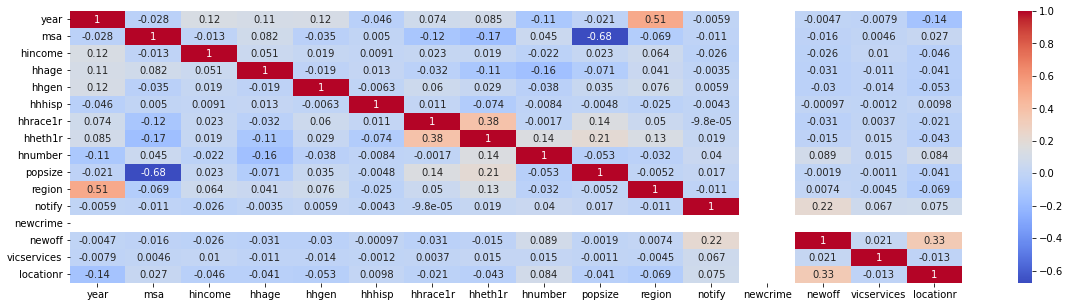

In [224]:
plt.rcParams["figure.figsize"] = (20, 5)
figHeatmap = sns.heatmap(dfPreprocessed.corr(), annot = True, cmap='coolwarm')

'newcrime' has no corelation with 'notify'. So it can be dropped.  
All the columns have a significant corelation with 'notify' and hence, should not be removed

In [225]:
dfPreprocessed.drop('newcrime', inplace=True, axis=1)

<h3> 4. One-hot encode categorical variables </h3>
All the columns are categorical, and hence for the models to give equal importance </br>
to their values, they need to be one-hot encoded

In [226]:
print ('Shape before one-hot encoding: ' + str(dfPreprocessed.shape))

dfEncoded = pd.get_dummies(data = dfPreprocessed, columns = [
  'year',
  'msa',
  'hincome',
  'hhage',
  'hhgen',
  'hhhisp',
  'hhrace1r',
  'hheth1r',
  'hnumber',
  'popsize',
  'region',
  'newoff',
  'vicservices',
  'locationr'
  ])

print ('Shape after one-hot encoding: ' + str(dfEncoded.shape))


Shape before one-hot encoding: (213091, 15)
Shape after one-hot encoding: (213091, 81)


In [227]:
dfEncoded.head()

,notify,year_1993,year_1994,year_1995,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,...,newoff_6,newoff_7,newoff_8,vicservices_1.0,vicservices_2.0,locationr_1,locationr_2,locationr_3,locationr_4,locationr_5
0,2,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0
1,2,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0
2,2,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0
4,2,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0


Replace '2' with '0' in 'notify' column so as to make it consistent with other columns format, which is now binary  
So now, instead of '2', '0' means No or Unnotified victimisation

In [228]:
dfEncoded.notify.replace(2, 0, inplace=True) 

In [229]:
dfEncoded.head()

,notify,year_1993,year_1994,year_1995,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,...,newoff_6,newoff_7,newoff_8,vicservices_1.0,vicservices_2.0,locationr_1,locationr_2,locationr_3,locationr_4,locationr_5
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0


<h1> Train Models </h1>

In [230]:
def performanceMetrics(test_y, pred_y, label, printMetrics = False):
  score_accuracy = accuracy_score(test_y, pred_y)
  score_recall = recall_score(test_y, pred_y)
  score_precision = precision_score(test_y, pred_y)
  score_f1 = f1_score(test_y, pred_y)

  if (printMetrics):
    print('accuracy_score: %.3f' % score_accuracy)
    print('Recall: %.3f' % score_recall)
    print('Precision: %.3f' % score_precision)
    print('F1 Score: %.3f' % score_f1)

  return label, score_accuracy, score_recall, score_precision, score_f1, pred_y

In [231]:
def printConfusionMatrix(validate_Y, pred_Y, label):
  confusionMatrix = confusion_matrix(y_true = validate_Y, y_pred = pred_Y)

  index = ['Actual No', 'Actual Yes']
  columns = ['Predicted No', 'Predicted Yes']
  
  dfConfusionMatrix = pd.DataFrame(data = confusionMatrix, columns = columns, index = index)
  sns.heatmap(dfConfusionMatrix, annot=True, fmt='d', cmap='YlGnBu')

  plt.title('Confusion Matrix - ' + label)
  plt.show()

<h3> Linear Regression </h3>

In [232]:
def modelLinearRegression(train_X, test_X, train_y, test_y, label, printMetrics = False):
  lr = LinearRegression(n_jobs = -1) # Use all available cores
  model = lr.fit(train_X, train_y)
  pred_y = model.predict(test_X)
  
  # As the target variable is binary in nature, we set a threshold
  # and convert pred_y values to binary based around that

  THRESHOLD = 0.5
  pred_y = [1 if x > THRESHOLD else 0 for x in pred_y]

  return performanceMetrics(test_y, pred_y, label, printMetrics)
  

<h3> Logistic Regression </h3>

In [233]:
def modelLogisticRegression(train_X, test_X, train_y, test_y, label, printMetrics = False):
  logmodel = LogisticRegression(random_state = RANDOM_STATE, n_jobs = -1) # Use all available cores
  model = logmodel.fit(train_X, train_y)
  pred_y = model.predict(test_X)

  return performanceMetrics(test_y, pred_y, label, printMetrics)

<h3> Decision Trees </h3>

In [287]:
def modelDecisionTree(train_X, test_X, train_y, test_y, label, printMetrics = False):
  dtc = DecisionTreeClassifier(random_state = RANDOM_STATE)
  dtc.fit(train_X, train_y)
  pred_y = dtc.predict(test_X)

  return performanceMetrics(test_y, pred_y, label, printMetrics)

<h3> Random Forest </h3>

In [235]:
def modelRandomForest(train_X, test_X, train_y, test_y, label, printMetrics = False):
  rfc = RandomForestClassifier(n_jobs = -1, random_state = RANDOM_STATE)
  rfc.fit(train_X, train_y)
  pred_y = rfc.predict(test_X)

  return performanceMetrics(test_y, pred_y, label, printMetrics)

<h3> K Nearest Neighbours </h3>

In [236]:
def modelKNN(train_X, test_X, train_y, test_y, label, printMetrics = False):
  n_neighbors = len(np.unique(train_y)) + 1 # Choosing odd number of neighbours (3) nearest to number of classes, 2
  knn = KNeighborsClassifier(n_neighbors = 3) 
  knn.fit(train_X, train_y)
  pred_y = knn.predict(test_X)

  return performanceMetrics(test_y, pred_y, label, printMetrics)

<h3>K-Means Clustering with SVM for classification</h3>

In [237]:
def modelKMeans(train_X, test_X, train_y, test_y, label, printMetrics = False):
  n_clusters = len(np.unique(train_y)) # 2 (0 and 1). So 2 clusters is the target.
  clf = KMeans(n_clusters = n_clusters, random_state = RANDOM_STATE)
  clf.fit(train_X)
  
  y_labels_train = clf.labels_
  y_labels_test = clf.predict(test_X)

  train_X['km_clust'] = y_labels_train
  test_X['km_clust'] = y_labels_test

  model = SVC()
  model.fit(train_X, train_y)
  pred_y = model.predict(test_X)
  
  return performanceMetrics(test_y, pred_y, label, printMetrics)

<h3> Neural Network </h3>

In [238]:
def modelNeuralNetwork(train_X, test_X, train_y, test_y, label, printMetrics = False):
  mlp = MLPClassifier(random_state = RANDOM_STATE, verbose=False)
  mlp.fit(train_X, train_y)
  pred_y = mlp.predict(test_X)

  return performanceMetrics(test_y, pred_y, label, printMetrics)

<h1> Model Evaluation - I</h1>

In [241]:
LABEL_LINEAR_REGRESSION = 'Linear Regression'
LABEL_LOGISTIC_REGRESSION = 'Logistic Regression'
LABEL_DECISION_TREE = 'Decision Tree'
LABEL_RANDOM_FOREST = 'Random Forest'
LABEL_NEURAL_NETWORK = 'Neural Network'

def getEvaluationMetrics(X_train, X_validate, y_train, y_validate):
  evaluationMetrics = [] # label, score_accuracy, score_recall, score_precision, score_f1, pred_y

  evaluationMetrics.append(modelLinearRegression(X_train, X_validate, y_train, y_validate, LABEL_LINEAR_REGRESSION))
  evaluationMetrics.append(modelLogisticRegression(X_train, X_validate, y_train, y_validate, LABEL_LOGISTIC_REGRESSION))
  evaluationMetrics.append(modelDecisionTree(X_train, X_validate, y_train, y_validate, LABEL_DECISION_TREE))
  evaluationMetrics.append(modelRandomForest(X_train, X_validate, y_train, y_validate, LABEL_RANDOM_FOREST))
  evaluationMetrics.append(modelNeuralNetwork(X_train, X_validate, y_train, y_validate, LABEL_NEURAL_NETWORK))

  return evaluationMetrics

In [243]:
RANDOM_STATE = 2022

dfPrediction = dfEncoded.copy()
Y_sample = dfPrediction['notify']
X_sample = dfPrediction.drop('notify', axis=1)

X_train, X_validate, y_train, y_validate = train_test_split(X_sample, Y_sample, test_size=0.2, random_state=RANDOM_STATE)

In [244]:
evaluationMetrics = getEvaluationMetrics(X_train, X_validate, y_train, y_validate)

Due to the high dimensionality of the training data, clustering algorithms are not running efficiently at this point

In [293]:
models = []
scores = []

def plotEvaluationMetrics(scoresIndex, title, evaluationMetrics):
  models = [evaluationMetric[0] for evaluationMetric in evaluationMetrics]
  scores = [(round(evaluationMetric[scoresIndex] * 100, 3)) for evaluationMetric in evaluationMetrics]

  figScore, axScore = plt.subplots()
  axScore.barh(models, scores)
  for i, v in enumerate(scores):
    axScore.text(v + .5, i, str(v))

  plt.title(title)
  plt.xlabel('Percentage')
  plt.ylabel('Model')
  plt.show()

  return figScore

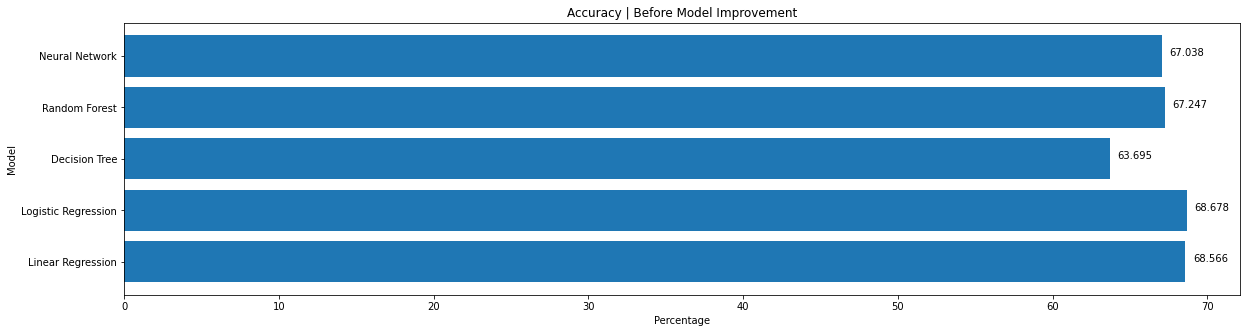

In [294]:
figAccuracyBeforeModelImprovement = plotEvaluationMetrics(1, 'Accuracy | Before Model Improvement', evaluationMetrics)

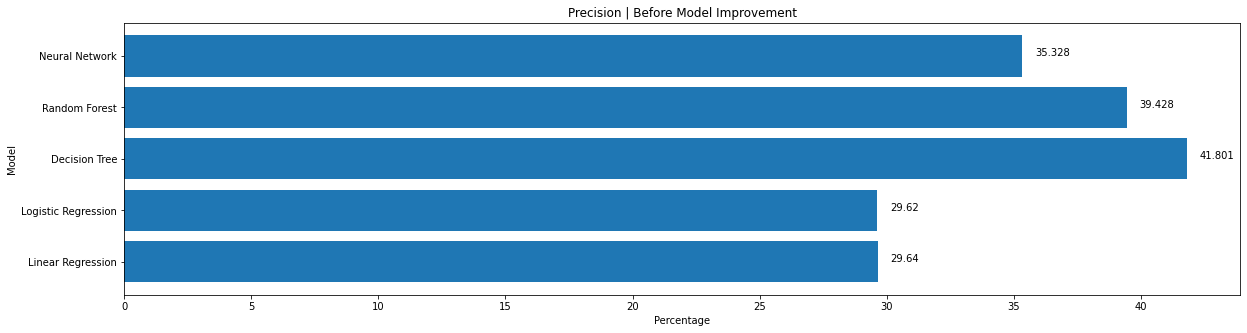

In [295]:
figPrecisionBeforeModelImprovement = plotEvaluationMetrics(2, 'Precision | Before Model Improvement', evaluationMetrics)

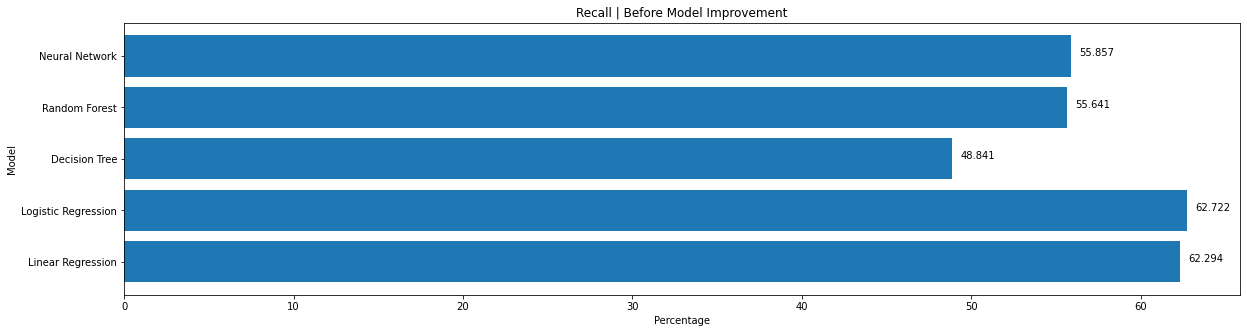

In [296]:
figRecallBeforeModelImprovement = plotEvaluationMetrics(3, 'Recall | Before Model Improvement', evaluationMetrics)

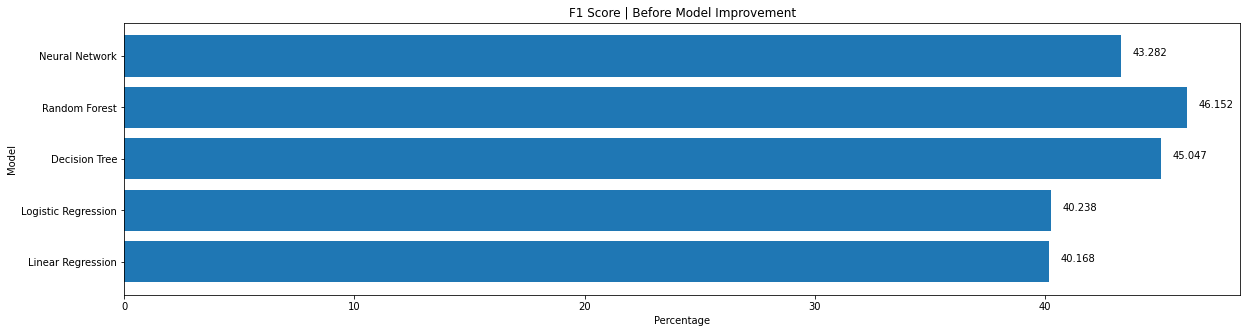

In [297]:
figF1ScoreBeforeModelImprovement = plotEvaluationMetrics(4, 'F1 Score | Before Model Improvement', evaluationMetrics)

Logistic Regression has the highest accuracy score amongst the other 5 models - 68.678 %  
It also has the least precision and highest recall which implies that even though its accuracy is high it is not the best model for the task  
  
On the other hand, even though Random Forest and Decision Tree have slightly lesser accuracy than Logistic Regression,  
they have a higher precision and lower recall which imply that they are better models for the task  
  
Between Random Forest and Decision Tree, Random Forest has better accuracy and a better F1 score,  
which builds up to the conclusion that Random Forest is the best suited model.  



In [273]:
figAccuracyBeforeModelImprovement.savefig('12-accuracy-before-model-improvement.pdf', bbox_inches='tight')
figPrecisionBeforeModelImprovement.savefig('13-precision-before-model-improvement.pdf', bbox_inches='tight')
figRecallBeforeModelImprovement.savefig('14-recall-before-model-improvement.pdf', bbox_inches='tight')
figF1ScoreBeforeModelImprovement.savefig('15-f1-score-before-model-improvement.pdf', bbox_inches='tight')

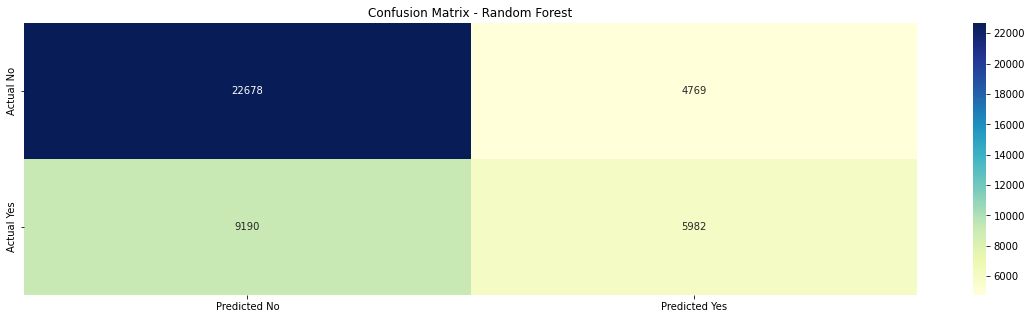

In [275]:
# Random Forest Y predictions
rfBeforeModelImprovementPredY = []
for evaluationMetric in evaluationMetrics:
  if (evaluationMetric[0] == LABEL_RANDOM_FOREST):
    rfBeforeModelImprovementPredY = evaluationMetric[-1]
printConfusionMatrix(y_validate, rfBeforeModelImprovementPredY, 'Random Forest')

<h1> Model Improvement - Data Improvement</h1>
The best model amongst selected models with default configurations is Random Forest with a 67.247% accuracy </br>
Here we try to improve this percentage with changes to the feeding data.

In [276]:
dfPreprocessed['notify'].value_counts()

2    136972
1     76119
Name: notify, dtype: int64

The number of unnotified crimes (notify = 2) is almost twice the number of notified crimes (notify = 1)  
This might be leaning the model predictions more towards unnotified crimes  
To resolve this, we will 'oversample' rows with notify = 1 to make them equal in count with those with notify = 2 

In [282]:
dfPreprocessedAndSampled = pd.DataFrame()

# Append rows with notify = 2
dfPreprocessedAndSampled = dfPreprocessedAndSampled.append(dfPreprocessed[dfPreprocessed['notify'] == 2])

# Oversample rows with notify = 1
smpl = dfPreprocessed[dfPreprocessed['notify'] == 1]
smplToSize = 136972 # Number of rows with notify = 2
dfPreprocessedAndSampled = dfPreprocessedAndSampled.append(smpl.sample(smplToSize, random_state = RANDOM_STATE, replace = True))

C:\Users\uttej\AppData\Local\Temp\ipykernel_992\1532395319.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfPreprocessedAndSampled = dfPreprocessedAndSampled.append(dfPreprocessed[dfPreprocessed['notify'] == 2])
C:\Users\uttej\AppData\Local\Temp\ipykernel_992\1532395319.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfPreprocessedAndSampled = dfPreprocessedAndSampled.append(smpl.sample(smplToSize, random_state = RANDOM_STATE, replace = True))


In [283]:
dfPreprocessedAndSampled['notify'].value_counts()

2    136972
1    136972
Name: notify, dtype: int64

Now that there are equal number of rows for both classes of 'notify',  
encode the dataframe and run the model evaluation on it again

In [284]:
# Encode sampled data
dfSampledAndEncoded = pd.get_dummies(data = dfPreprocessedAndSampled, columns = [
  'year',
  'msa',
  'hincome',
  'hhage',
  'hhgen',
  'hhhisp',
  'hhrace1r',
  'hheth1r',
  'hnumber',
  'popsize',
  'region',
  'newoff',
  'vicservices',
  'locationr'
  ])

# Make notify column binary
dfSampledAndEncoded.notify.replace(2, 0, inplace=True) 

<h1> Model Evaluation - II </h1>
We run model evaluation with the sampled data here

In [285]:
dfPredictionOnSampled = dfSampledAndEncoded.copy()
Y_sample_data_improv = dfPredictionOnSampled['notify']
X_sample_data_improv = dfPredictionOnSampled.drop('notify', axis=1)

X_train_data_improv, X_validate_data_improv, y_train_data_improv, y_validate_data_improv = train_test_split(X_sample_data_improv, Y_sample_data_improv, test_size=0.2, random_state=RANDOM_STATE)

In [288]:
evaluationMetricsAfterDataImprov = getEvaluationMetrics(X_train_data_improv, X_validate_data_improv, y_train_data_improv, y_validate_data_improv)

c:\Users\uttej\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Clustering algorithms are still not run at this point as the dimensionality of the input is too great

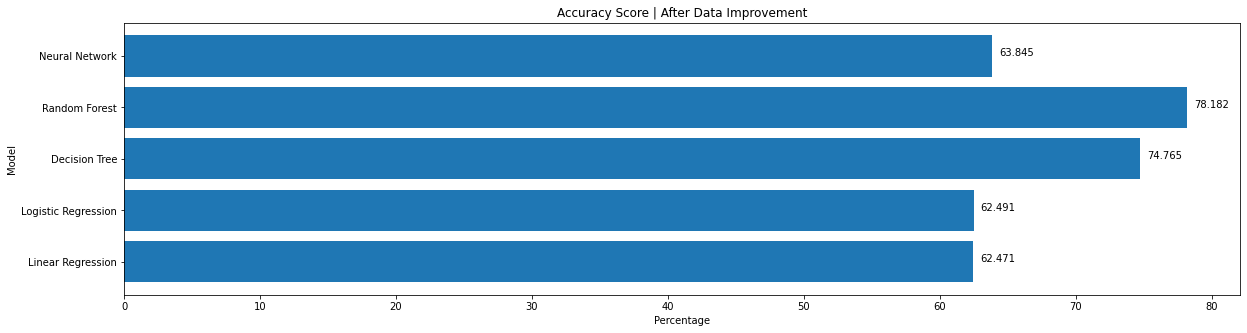

In [299]:
figAccuracyScoreAfterModelImprovement = plotEvaluationMetrics(1, 'Accuracy Score | After Data Improvement', evaluationMetricsAfterDataImprov)

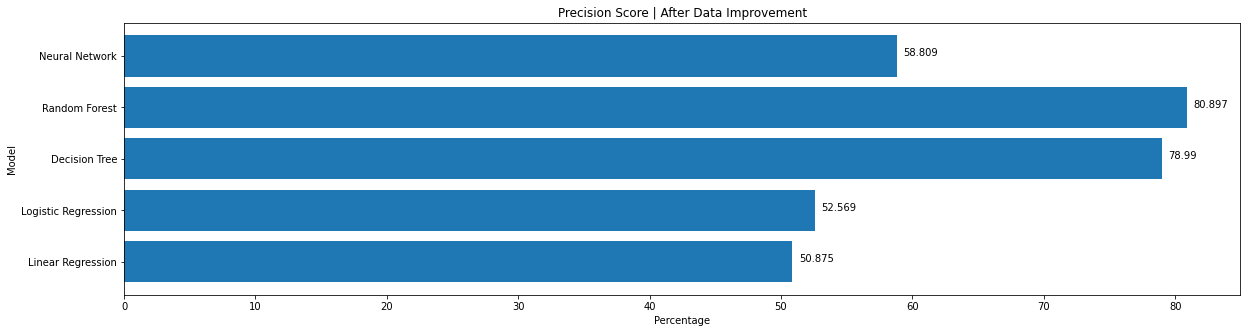

In [300]:
figPrecisionScoreAfterModelImprovement = plotEvaluationMetrics(2, 'Precision Score | After Data Improvement', evaluationMetricsAfterDataImprov)

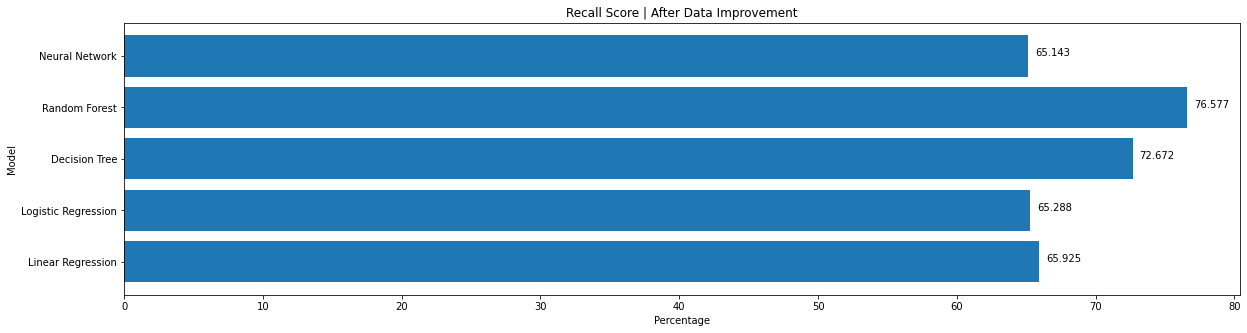

In [301]:
figRecallScoreAfterModelImprovement = plotEvaluationMetrics(3, 'Recall Score | After Data Improvement', evaluationMetricsAfterDataImprov)

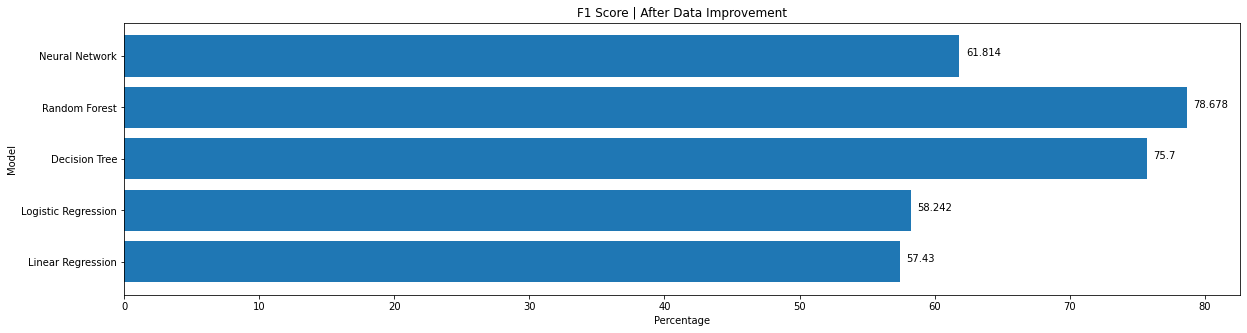

In [302]:
figF1ScoreAfterModelImprovement = plotEvaluationMetrics(4, 'F1 Score | After Data Improvement', evaluationMetricsAfterDataImprov)

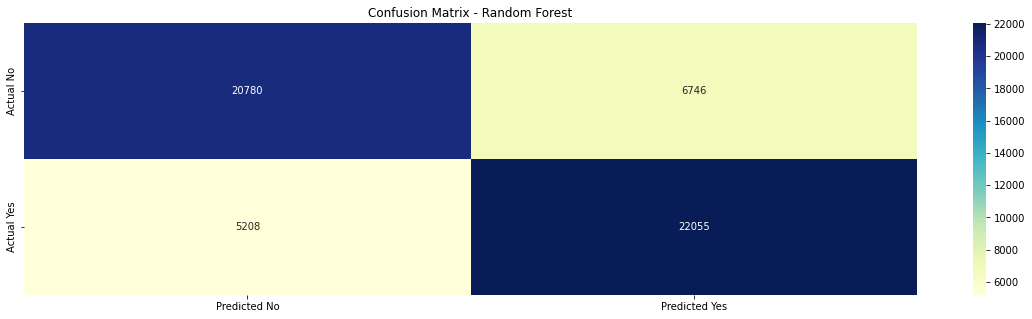

In [303]:
# Random Forest Y predictions
rfPredYAfterDataImprov = []
for evaluationMetric in evaluationMetricsAfterDataImprov:
  if (evaluationMetric[0] == LABEL_RANDOM_FOREST):
    rfPredYAfterDataImprov = evaluationMetric[-1]
printConfusionMatrix(y_validate_data_improv, rfPredYAfterDataImprov, LABEL_RANDOM_FOREST)

With oversampling of the data, Random Forest model performed the best with an accuracy of 78.182% and a F1 score of 78.678%

In [305]:
figAccuracyScoreAfterModelImprovement.savefig('16-accuracy-after-model-improvement.pdf', bbox_inches='tight')
figPrecisionScoreAfterModelImprovement.savefig('17-precision-after-model-improvement.pdf', bbox_inches='tight')
figRecallScoreAfterModelImprovement.savefig('18-recall-after-model-improvement.pdf', bbox_inches='tight')
figF1ScoreAfterModelImprovement.savefig('19-f1-score-after-model-improvement.pdf', bbox_inches='tight')

<h1> Model Evaluation - III </h1>
Here, we evaluate clustering algorithms

In [148]:
dfSampledAndEncoded.shape

(273944, 81)

<h3>Principal Component Analysis</h3>

Due to the high dimensionality (81 columns), clustering will not be very efficient.  
To prepare data for clustering models, we will perform PCA and reduce dimensions to 4 (chosen arbitrarily)

In [167]:
dfPCA = dfSampledAndEncoded.copy()

In [176]:
features = dfPCA.loc[:, dfPCA.columns != 'notify'].values
target = dfPCA.loc[:, ['notify']].values

pca = PCA(n_components = 4)

principalComponents = pca.fit_transform(features)
dfPrincipalComponents = pd.DataFrame(data = principalComponents)
dfPrincipalComponentsTarget = pd.DataFrame(data = target, columns = ['notify'])

dfPrincipalComponents.head()

,0,1,2,3
0,-0.651492,0.375195,-0.399749,0.399785
1,-0.651492,0.375195,-0.399749,0.399785
2,-0.651492,0.375195,-0.399749,0.399785
3,-0.295339,-0.714803,-0.027041,-0.124507
4,-0.904238,-0.359772,1.196762,-0.495250


In [177]:
dfPrincipalComponentsFinal = pd.concat([dfPrincipalComponents, dfPrincipalComponentsTarget], axis = 1)
dfPrincipalComponentsFinal.head()

,0,1,2,3,notify
0,-0.651492,0.375195,-0.399749,0.399785,0
1,-0.651492,0.375195,-0.399749,0.399785,0
2,-0.651492,0.375195,-0.399749,0.399785,0
3,-0.295339,-0.714803,-0.027041,-0.124507,0
4,-0.904238,-0.359772,1.196762,-0.495250,0


In [186]:
dfPredictionOnPrincipalComponents = dfPrincipalComponentsFinal.copy()
Y_sample_pc = dfPredictionOnPrincipalComponents['notify']
X_sample_pc = dfPredictionOnPrincipalComponents.drop('notify', axis=1)

X_train_pc, X_validate_pc, y_train_pc, y_validate_pc = train_test_split(X_sample_pc, Y_sample_pc, test_size=0.2, random_state=RANDOM_STATE)

In [189]:
clusteringEvalMetrics = []

LABEL_KNN = 'K Nearest Neighbours'
clusteringEvalMetrics.append(modelKNN(X_train, X_validate, y_train, y_validate, LABEL_KNN))

LABEL_K_MEANS = 'K Means'
clusteringEvalMetrics.append(modelKMeans(X_train, X_validate, y_train, y_validate, LABEL_K_MEANS))

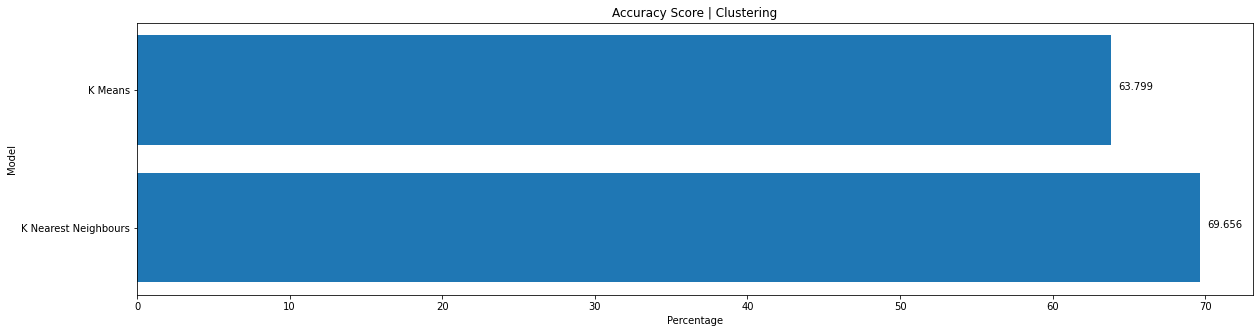

In [306]:
figAccuracyScoreClustering = plotEvaluationMetrics(1, 'Accuracy Score | Clustering', clusteringEvalMetrics)

Clustering algorithms with the current configuration have a lesser accuracy percentage than Random Forest

<h1> Conclusion </h1>

Plot all evaluation metrics together for better comparison

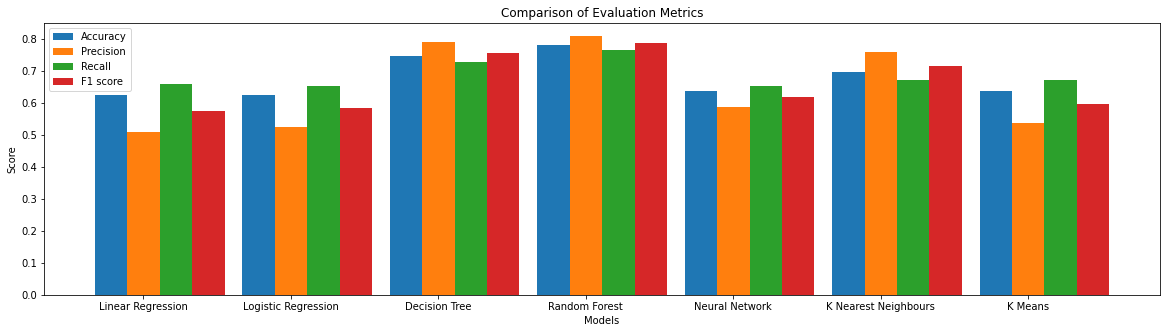

In [316]:
finalEvaluationMetrics = evaluationMetricsAfterDataImprov + clusteringEvalMetrics

models = []
scoreAccuracy = []
scorePrecision = []
scoreRecall = []
scoreF1 = []

for evalMetric in finalEvaluationMetrics:
  models.append(evalMetric[0])
  scoreAccuracy.append(evalMetric[1])
  scorePrecision.append(evalMetric[2])
  scoreRecall.append(evalMetric[3])
  scoreF1.append(evalMetric[4])

figFinalComparison, axFinalComparison = plt.subplots()
pltStartingIndex = np.arange(len(models))
width = 0.22

bar1 = plt.bar(pltStartingIndex, scoreAccuracy, width)
bar2 = plt.bar(pltStartingIndex + width, scorePrecision, width)
bar3 = plt.bar(pltStartingIndex + width * 2, scoreRecall, width)
bar4 = plt.bar(pltStartingIndex + width * 3, scoreF1, width)

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Comparison of Evaluation Metrics')

plt.xticks(pltStartingIndex + width, models)
plt.legend((bar1, bar2, bar3, bar4), ('Accuracy', 'Precision', 'Recall', 'F1 score'))

plt.show()

In [317]:
figFinalComparison.savefig('20-final-comparison-evaluation-metrics.pdf', bbox_inches='tight')


Random Forest is the model (among chosen models) best suited to predict whether a household is going to report a victimisation or not based on the given characteristics